<font size=5>Business Problem:</font>

The business problem is to identify which product categories have lower reviews and may contain inferior products, as well as which products have higher reviews and may contain superior products. This analysis aims to determine which products should be kept or dropped from Amazon's product roster based on customer satisfaction with Amazon-branded and manufactured products.

<font size=5>Business Solutions:</font>

The analysis will include the association of positive and negative sentiments for each product in Amazon's catalog using sentiment analysis. The sentiment analysis can also predict scores for reviews based on certain words. Potential suggestions for product reviews can be made based on the findings of the analysis.

<font size=5>Assumptions:</font>

The assumption is that the sample size of 30,000 examples is sufficient to represent the entire population of sales/reviews. Another assumption is that the information found in the text reviews of each product is rich enough to train a sentiment analysis classifier with an accuracy of greater than 70%.

In [1]:
%matplotlib inline 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
np.random.seed(7) # seeding random number generator


In [3]:
review_df = pd.read_csv(r"C:\Users\Rashmitha Shetty\Desktop\Personal Work\Amazon Sentiment Analysis\1429_1.csv")
review_df.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


In [4]:
data_an = review_df.copy()
data_an.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [5]:
data_an.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [6]:
data_an["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [7]:
asins_unique = len(data_an["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 42


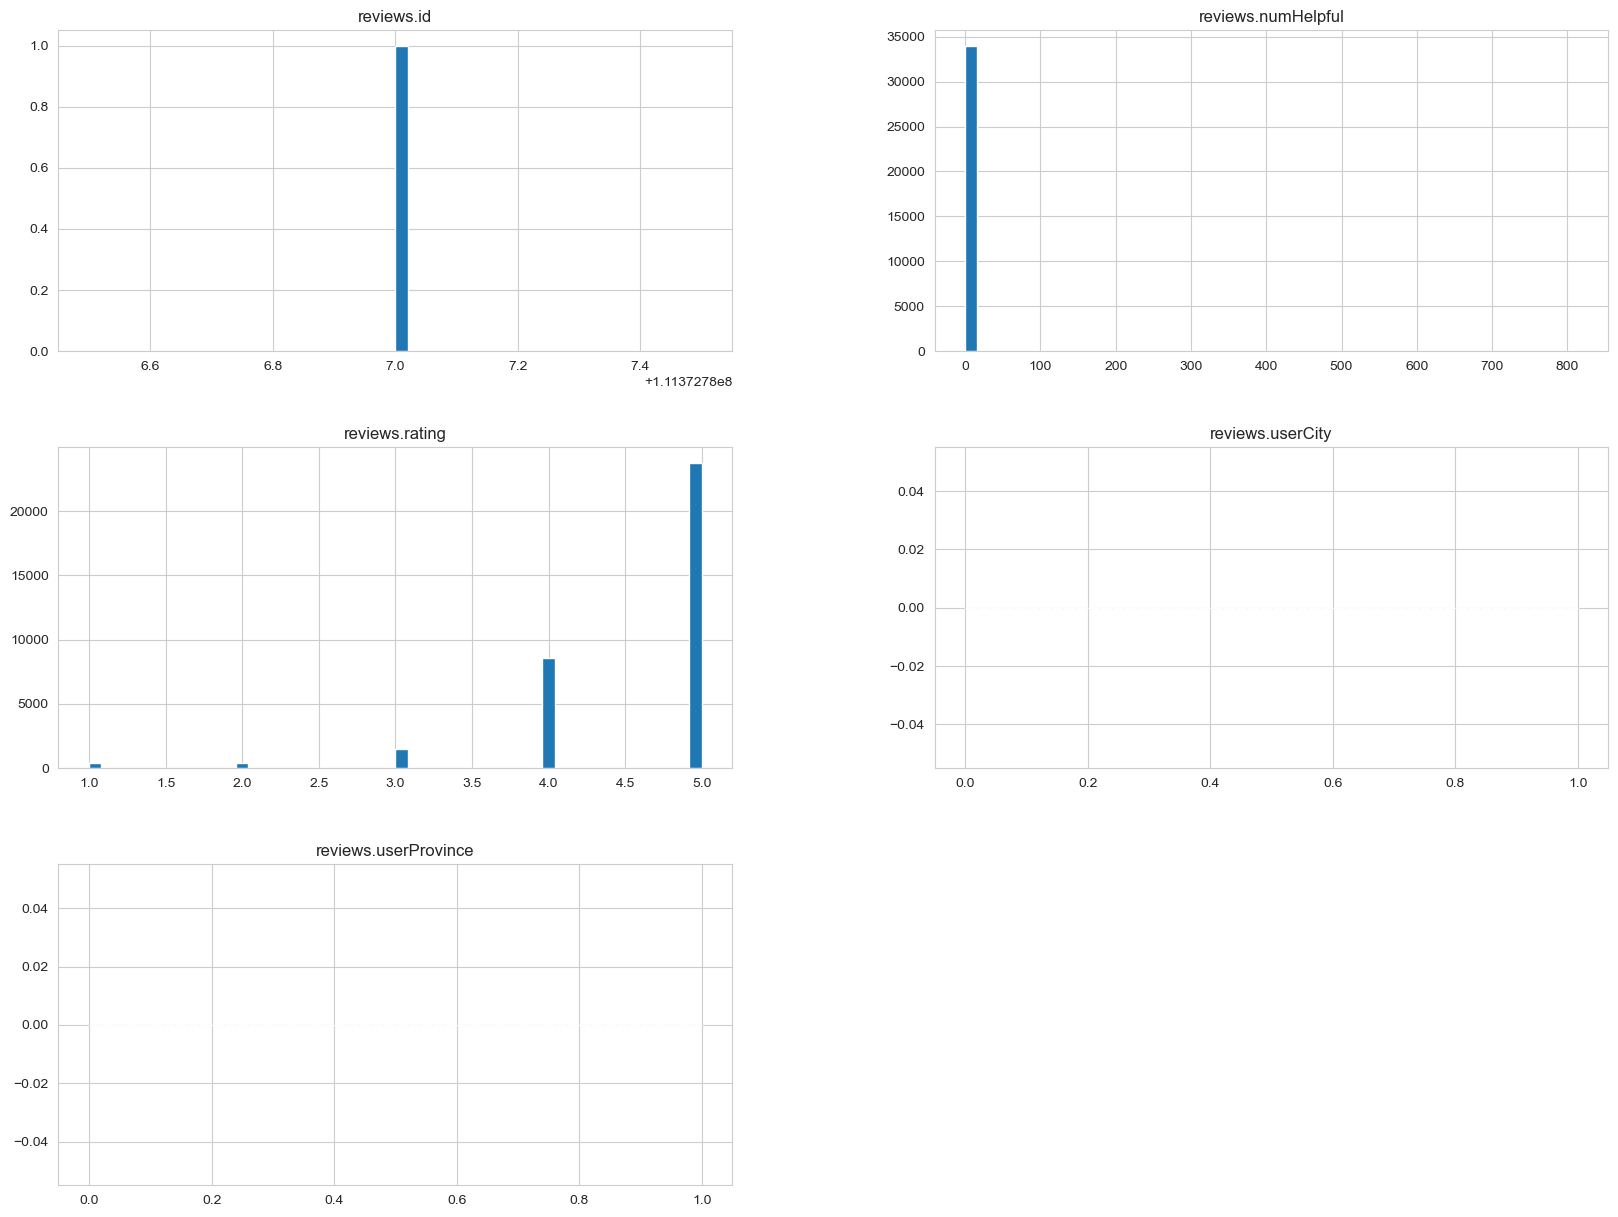

In [8]:
# Builds histogram and set the number of bins and fig size (width, height)
data_an.hist(bins=50, figsize=(20,15))
plt.show()

<font size =10 >Splitting into train and test data sets </font>


In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(data_an)))
dataAfter = data_an.dropna(subset=["reviews.rating"]) # removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 34660
After 34627


In [10]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter, dataAfter["reviews.rating"]): 
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

Check if the train and test sets were stratified proportionately

In [11]:
len(strat_train)

27701

In [12]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.689864
4.0    0.244730
3.0    0.042160
1.0    0.011406
2.0    0.011118
Name: reviews.rating, dtype: float64

<font size =10 >Data Exploration </font>

In [13]:
reviews = strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
4349,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2015-11-28T00:00:00.000Z,2017-05-21T04:06:08Z,"2017-04-30T00:26:00.000Z,2017-06-07T08:10:00.000Z",...,True,NaN,5.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,we bought this for my 11 year old daughter and...,great for all ages,NaN,NaN,Mark
30776,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2017-01-06T00:00:00.000Z,2017-09-20T05:35:55Z,"2017-08-25T22:21:42.763Z,2017-08-19T09:26:46.1...",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,"I have the Roku 4, and new Apple TV, this stre...",Great streaming box,NaN,NaN,Techno


In the next step, we will examine the columns listed below:

asins
name
reviews.rating
reviews.doRecommend
(Note that we cannot investigate the 'reviews.numHelpful' column as its values are limited to a range of 0-13, as identified in the previous analysis of the raw data)
(Similarly, we cannot analyze the 'reviews.text' column as it contains long phrases)
Furthermore, we will also scrutinize the columns associated with 'asins'.

In [14]:

len(reviews["name"].unique()), len(reviews["asins"].unique())

(47, 35)

In [15]:

reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 4349 to 29636
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22268 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19228 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27257 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27304 non-null  float64
 14  reviews.rating        27673 non-null  float64
 15  reviews.sourceUR

The tentative assumption is that there are 35 distinct products represented by the ASINs in the training data set. Each ASIN corresponds to a specific product, but there are more product names (47) listed. 
The focus is on the ASINs since they represent the products under consideration. 
It's worth noting that there is a one-to-many relationship between ASINs and names, meaning that a single ASIN may be associated with multiple names, often due to different vendor listings. 
Furthermore, there may be many missing names or unique names with minor variations in the title, such as '8gb' vs. '8 gb', or 'NAN' for product names.

In [16]:

reviews.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00IOY8XWQ               [Kindle Paperwhite,,,\r\nKindle Paperwhite,,,,...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE                            [Echo (White),,,\r\nEcho (White),,,]
B00U3FPN4U         

In [17]:
# Lets see all the different names for this product that have 2 ASINs
different_names = reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red

In [18]:
reviews[reviews["asins"] == "B00L9EPT8O,B01E6AO69U"]["name"].value_counts()

Echo (White),,,\r\nEcho (White),,,                                                                                                                                                                                  2318
Amazon Fire Tv,,,\r\nAmazon Fire Tv,,,                                                                                                                                                                              2029
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,\r\nAmazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,                                                                           259
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,\r\nAmazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,                                                           106
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,\r\nAmazon 9W PowerFast Offici

<b> Our hypothesis has been verified; it appears that each ASIN can have multiple names. Consequently, our primary focus should be on the performance of the ASINs rather than the associated product names.</b>

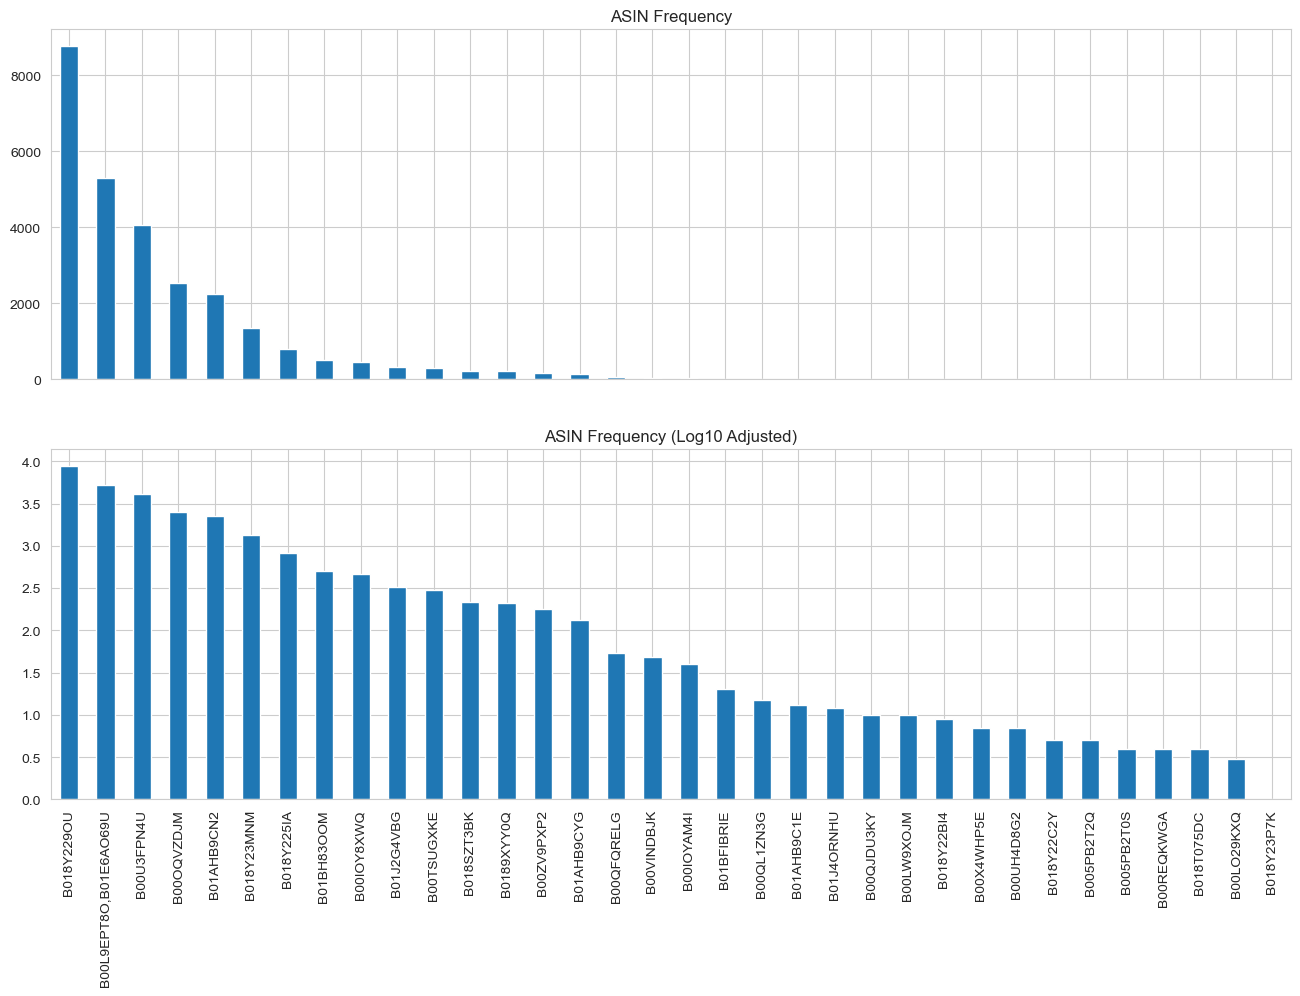

In [19]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1,title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2, title="ASIN Frequency (Log10 Adjusted)") 
plt.show()


-The bar graph for ASINs indicates that some products have significantly more reviews than others, which could suggest higher sales of those particular products. 

-Furthermore, the distribution of ASINs appears to be right-skewed, which may also imply that certain products have higher sales, as evidenced by the higher frequency of those ASINs in the reviews. 

-To gain a more comprehensive understanding of each ASIN, we normalized the data by taking the logarithm, and observed that the distribution continues to exhibit a right-skewed pattern.

<b>The above observations address the initial inquiry, indicating that certain ASINs (products) exhibit stronger sales while others have weaker sales. This information is critical in determining which products should be retained or removed from consideration.</b>

In [20]:
# Entire training dataset average rating
reviews["reviews.rating"].mean()

4.5841072525566435

<font size = 8> reviews.rating  and ASINs </font>

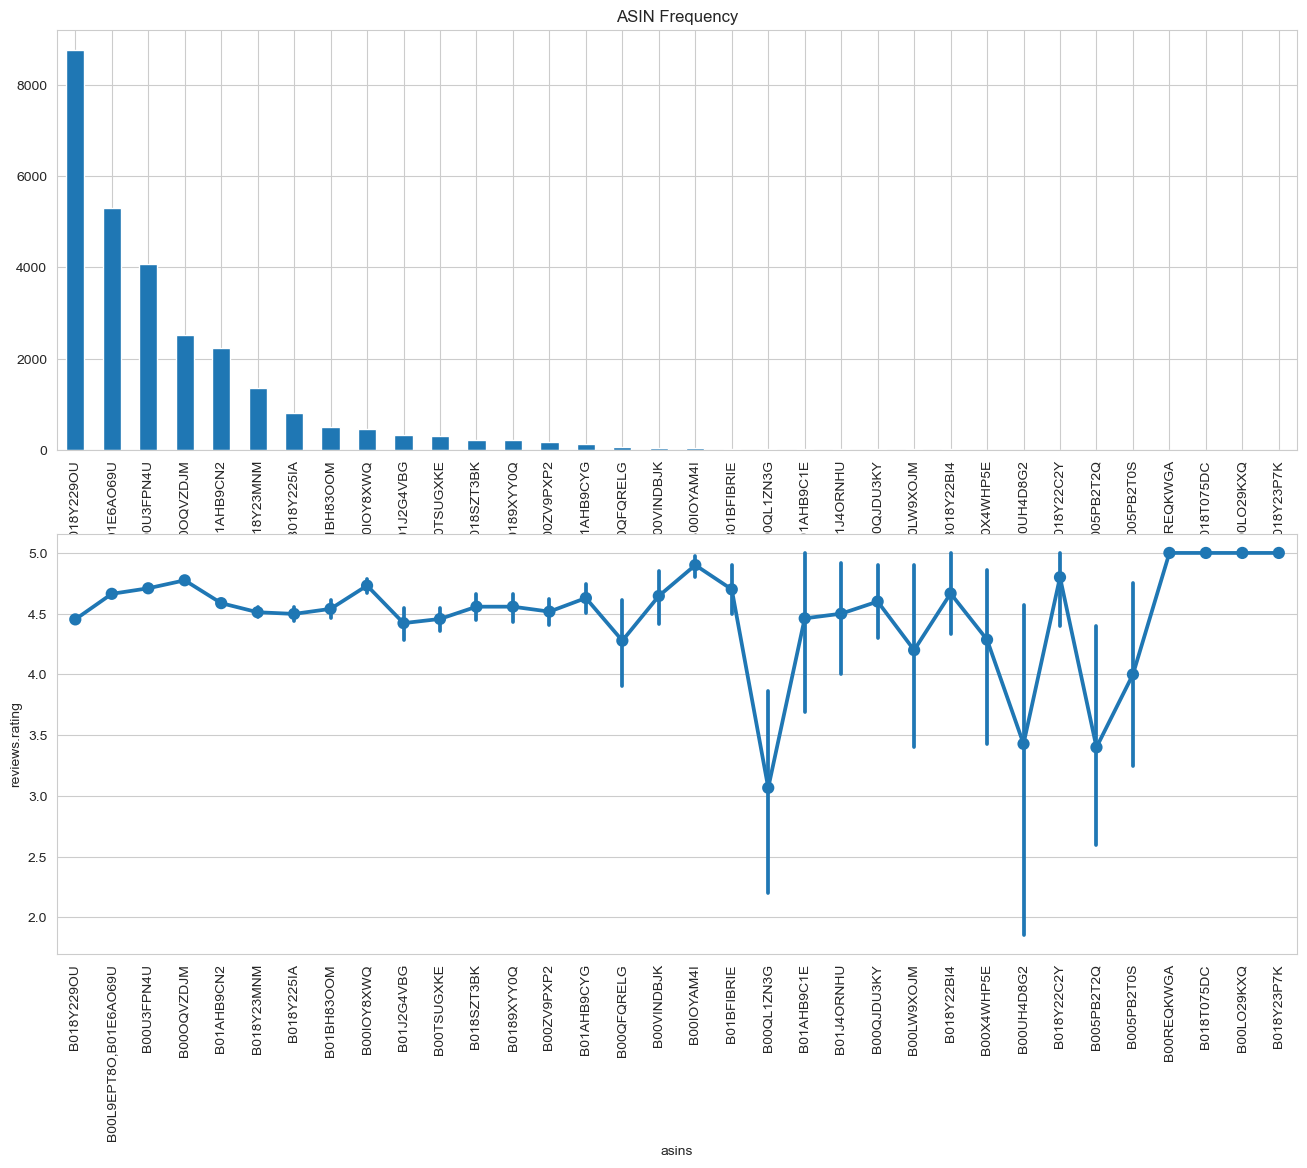

In [21]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

1a) The most frequently reviewed products have their average review ratings in the 4.5 - 4.8 range, with little variance
1b) Although there is a slight inverse relationship between the ASINs frequency level and average review ratings for the first 4 ASINs, this relationship is not significant since the average review for the first 4 ASINs are rated between 4.5 - 4.8, which is considered good overall reviews
2a) For ASINs with lower frequencies as shown on the bar graph (top), we see that their corresponding average review ratings on the point-plot graph (bottom) has significantly higher variance as shown by the length of the vertical lines. As a result, we suggest that, the average review ratings for ASINs with lower frequencies are not significant for our analysis due to high variance
2b) On the other hand, due to their lower frequencies for ASINs with lower frequencies, we suggest that this is a result of lower quality products
2c) Furthermore, the last 4 ASINs have no variance due to their significantly lower frequencies, and although the review ratings are a perfect 5.0, but we should not consider the significance of these review ratings due to lower frequency as explained in 2a)


<b>Note that point-plot graph automatically takes the average of the review.rating data</b>

<font size = 8> reviews.doRecommend  and ASINs </font>

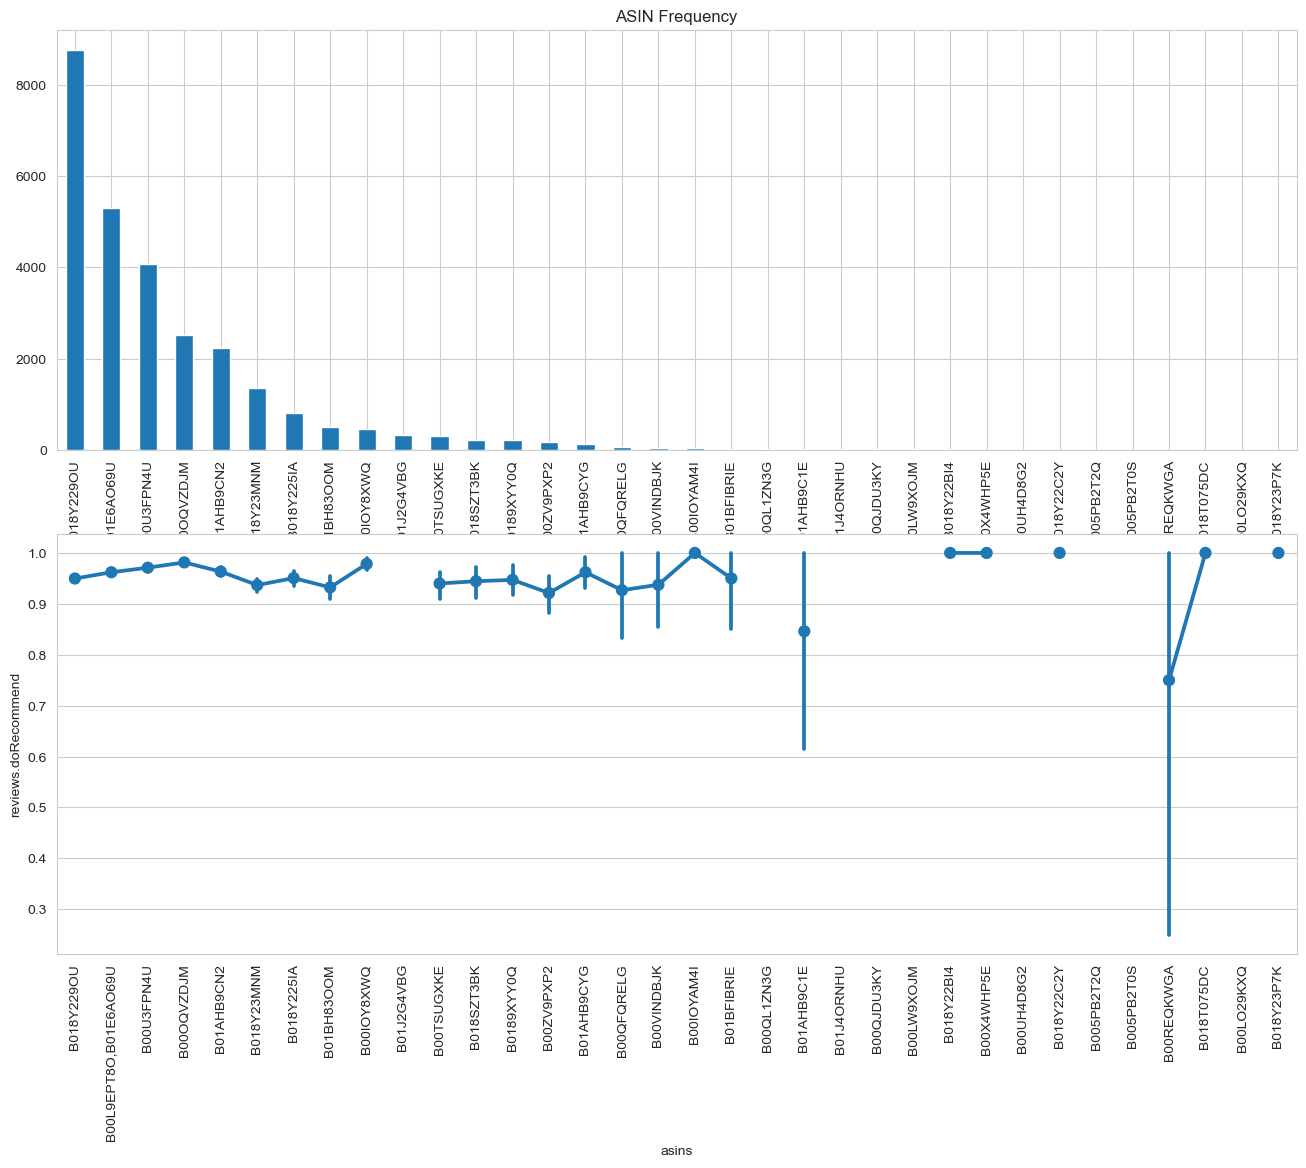

In [22]:
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()


Upon analyzing the data, it is evident that the initial 19 ASINs demonstrate a high level of consumer recommendation.
This finding aligns with the previous analysis of "reviews.rating / ASINs," which showed that the first 19 ASINs received positive ratings ranging from 4.0 to 5.0.
Conversely, the remaining ASINs exhibit fluctuating results, which may be attributed to a smaller sample size and should be discounted. 

<b> further analysis of "reviews.text" will be performed using Sentiment Analysis </b>

<font size =10> Finding Correlation </font>

In [23]:
corr_matrix = reviews.corr()
corr_matrix
# Here we can analyze reviews.ratings with asins

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
reviews.id,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.00000,-0.04372,NaN,NaN
reviews.rating,NaN,-0.04372,1.00000,NaN,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN


In [24]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27701 entries, 4349 to 29636
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    27673 non-null  object 
 1   name                  22268 non-null  object 
 2   asins                 27672 non-null  object 
 3   brand                 27673 non-null  object 
 4   categories            27673 non-null  object 
 5   keys                  27673 non-null  object 
 6   manufacturer          27673 non-null  object 
 7   reviews.date          27659 non-null  object 
 8   reviews.dateAdded     19228 non-null  object 
 9   reviews.dateSeen      27673 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   27257 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    27304 non-null  float64
 14  reviews.rating        27673 non-null  float64
 15  reviews.sourceUR

In [25]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,8772
"B00L9EPT8O,B01E6AO69U",5304
B00U3FPN4U,4076
B00OQVZDJM,2525
B01AHB9CN2,2241


In [26]:

avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.400000
B00IOY8XWQ,4.731183
B00IOYAM4I,4.900000
"B00L9EPT8O,B01E6AO69U",4.663462


In [27]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B018Y229OU,8772,4.453032
"B00L9EPT8O,B01E6AO69U",5304,4.663462
B00U3FPN4U,4076,4.709028
B00OQVZDJM,2525,4.774653
B01AHB9CN2,2241,4.586792
B018Y23MNM,1346,4.511887
B018Y225IA,811,4.498150
B01BH83OOM,504,4.539683
B00IOY8XWQ,465,4.731183
B01J2G4VBG,322,4.422360



plt.scatter("asins", "reviews.rating", data=table)
table.corr()

Based on our data exploration above, we observed that several ASINs with low frequencies exhibit high variances. As a result, we determined that these infrequently occurring ASINs do not carry much significance in our analysis due to their small sample size.

Moreover, our correlation analysis between ASINs and reviews.rating also revealed a negligible correlation, consistent with our previous findings.

<font size =10> Sentiment Analysis of the customer reviews </font>

<font size =6> - Set Target Variables </font>

In [28]:
#Segregate ratings from 1-5 into positive, neutral, and negative.
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

4349     Positive
30776    Positive
28775     Neutral
1136     Positive
17803    Positive
7336     Positive
32638    Positive
13995    Positive
6728     Negative
22009    Positive
11047    Positive
22754    Positive
5578     Positive
11673    Positive
19168    Positive
14903    Positive
30843    Positive
5440     Positive
28940    Positive
31258    Positive
Name: Sentiment, dtype: object

In [29]:
# Prepare data
X_train = strat_train["reviews.text"]
X_train_targetSentiment = strat_train["Sentiment"]
X_test = strat_test["reviews.text"]
X_test_targetSentiment = strat_test["Sentiment"]
print(len(X_train), len(X_test))

27701 6926


training samples- 27,701 

testing samples- 6926

<font size= 5>- Extract Features </font>

We will now utilize the Bag of Words strategy to transform content into numerical feature vectors through the following steps:

- Assign a fixed integer ID to each word occurrence, creating an integer indices to word occurrence dictionary.

- Create an array of words (our training set), where X[i,j] represents the integer indices and word occurrences, respectively.

To implement the Bag of Words strategy, we will leverage SciKit-Learn's CountVectorizer, which performs the following steps:

- Text preprocessing, which involves tokenization (breaking sentences into words) and filtering stopwords (such as "the," "are," etc.).

- Occurrence counting, which builds a dictionary of features from integer indices with word occurrences.

- Feature Vector creation, which converts the dictionary of text documents into a feature vector.







In [30]:
# Replace "nan" with space
X_train = X_train.fillna(' ')
X_test = X_test.fillna(' ')
X_train_targetSentiment = X_train_targetSentiment.fillna(' ')
X_test_targetSentiment = X_test_targetSentiment.fillna(' ')

# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape

(27701, 12526)


Our training sample consists of 27,701 samples and 12,526 unique words.

However, when working with longer documents, words that carry little meaning tend to have higher average count values, which can overshadow shorter documents with the same frequency but lower average counts. To address this redundancy, we will employ the TfidfTransformer.

The TfidfTransformer involves the following steps:

Term Frequencies (Tf) divides the number of occurrences for each word by the total number of words.
Term Frequencies times Inverse Document Frequency (Tfidf) scales down the weights of each word, assigning less importance to unimportant stop words such as "the," "are," etc.

In [31]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(27701, 12526)

<font size =5> Building a Pipeline using the Extracted Features </font>

Our classifier of choice is Multinomial Naive Bayes.

This particular algorithm is well-suited for word counts, where data is typically represented as word vector counts, i.e., the number of times an outcome number X[i,j] is observed over n trials. Multinomial Naive Bayes also ignores non-occurrences of a feature i.

The algorithm is based on Bayes Theorem, but it simplifies the calculations by assuming that all features are conditionally independent of each other (given the class). The probability of a feature x given a class y, P(x|y), is calculated using this assumption.

In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, X_train_targetSentiment)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf_nominalNB', MultinomialNB())])

<font size =5>- Testing the Model </font>

In [33]:
import numpy as np
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == X_test_targetSentiment)

0.9344498989315623

We observe that the accuracy level of our Multinomial Naive Bayes classifier based on the features is 93.45%.

<font size =5>- Testing other Models </font>

<b> Logistic Regression Classifier</b>

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, X_train_targetSentiment)
import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == X_test_targetSentiment)

0.9392145538550389

<b>Support Vector Machine Classifier</b>

In [35]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, X_train_targetSentiment)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == X_test_targetSentiment)

0.9393589373375686

<b>Decision Tree Classifier</b> 

In [36]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())])
clf_decisionTree_pipe.fit(X_train, X_train_targetSentiment)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == X_test_targetSentiment)

0.9016748483973434

<b>Random Forest Classifier</b>

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_randomForest", RandomForestClassifier())])
clf_randomForest_pipe.fit(X_train, X_train_targetSentiment)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == X_test_targetSentiment)

0.9350274328616807


All models achieved high accuracy levels (>90%). The Support Vector Machine Classifier had the highest accuracy level at 93.94%, so we will use it for further analysis. We will now fine-tune the Linear_SVC model to prevent any potential overfitting.

<font size =5>- Fine Tuning SVM</font>

We will perform a grid search to find the best parameters for our LinearSVC classifier pipeline, instead of adjusting the parameters of individual components. This will involve testing a range of possible parameter values and maximizing CPU cores. Once the grid search is complete, we will fit the best classifier to our training data set.

After fine-tuning, we will test our final classifier on some arbitrary reviews and calculate its accuracy. Support Vector Machines is well-suited for classification because it can differentiate between extreme values in different classes, allowing it to accurately classify reviews as Positive, Neutral, or Negative.

In [43]:
from sklearn.model_selection import GridSearchCV
parameters = {'vect__ngram_range': [(1, 1), (1, 2)],    
             'tfidf__use_idf': (True, False), 
             } 
gs_clf_LinearSVC_pipe = GridSearchCV(clf_linearSVC_pipe, parameters, n_jobs=-1)
gs_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.fit(X_train, X_train_targetSentiment)
new_text = ["The tablet is good, really liked it.", # positive
            "The tablet is ok, but it works fine.", # neutral
            "The tablet is not good, does not work very well."] # negative

X_train_targetSentiment[gs_clf_LinearSVC_pipe.predict(new_text)]

In [39]:
predictedGS_clf_LinearSVC_pipe = gs_clf_LinearSVC_pipe.predict(X_test)
np.mean(predictedGS_clf_LinearSVC_pipe == X_test_targetSentiment)

0.9408027721628646


- The results show that the features are correctly classifying the reviews as Positive, Neutral, or Negative, based on arbitrary test data. 

- Additionally, the accuracy level of our Support Vector Machine Classifier has improved to 94.08% after running the grid search.

<font size =5>- Performance Analysis of SVM </font>

Analyze the best mean score of the grid search (classifier, parameters, CPU core)

Analyze the best estimator

Analyze the best parameter

In [40]:
for performance_analysis in (gs_clf_LinearSVC_pipe.best_score_, 
                             gs_clf_LinearSVC_pipe.best_estimator_, 
                             gs_clf_LinearSVC_pipe.best_params_):
        print(performance_analysis)

0.9366809937342697
Pipeline(steps=[('vect', CountVectorizer(ngram_range=(1, 2))),
                ('tfidf', TfidfTransformer()), ('clf_linearSVC', LinearSVC())])
{'tfidf__use_idf': True, 'vect__ngram_range': (1, 2)}


Here we observe that the grid search yielded a best mean score of 93.65%, which is in close proximity to our previously achieved accuracy level of 94.08%. 

Additionally, the best estimator is also displayed here. Finally, the optimal parameters identified by the grid search include a value of True for use_idf in tfidf and an ngram_range between 1 and 2.

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe))
print('Accuracy: {}'. format(accuracy_score(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)))

              precision    recall  f1-score   support

                   0.00      0.00      0.00         5
    Negative       0.67      0.25      0.36       156
     Neutral       0.47      0.11      0.18       292
    Positive       0.95      1.00      0.97      6473

    accuracy                           0.94      6926
   macro avg       0.52      0.34      0.38      6926
weighted avg       0.92      0.94      0.92      6926

Accuracy: 0.9408027721628646


The classification report summary is presented below:

Precision determines the accuracy of positive reviews detected, while Recall measures the completeness of positive reviews detected. F1-score is the harmonic mean of both precision and recall. The Support column shows the number of samples in each class. The report confirms our earlier data exploration analysis, indicating a highly skewed dataset towards positive reviews as reflected in the lower Support counts of the classification report. Moreover, Neutral and Negative reviews exhibit large standard deviations with limited frequencies, implying a less significant predictor in the analysis, resulting in lower precision, recall, and F1-scores.

Despite the imbalanced dataset, the model shows a 94.08% accuracy level in predicting sentiment analysis, validated by successful arbitrary text (new_text) inputs. Thus, we remain comfortable with the current skewed dataset. Future input of more balanced data will enable the model to re-adjust to a balanced classifier, increasing the accuracy level.

Note: The first row was replaced with empty space, as removing it caused an error in Pandas DataFrame. Thus, it will be ignored in this analysis.

Finally, the analysis indicates that the products in this dataset generally receive positive ratings.

In [42]:
from sklearn import metrics
metrics.confusion_matrix(X_test_targetSentiment, predictedGS_clf_LinearSVC_pipe)

array([[   0,    0,    0,    5],
       [   0,   39,   13,  104],
       [   0,   14,   32,  246],
       [   0,    5,   23, 6445]], dtype=int64)

Please note that we previously replaced all NAN with " ", which is why the first row and column will be ignored in this analysis. This is the same situation as explained in the classification report.

By only considering rows 2-4 and columns 2-4 labeled as negative, neutral, and positive, we found that positive sentiment can sometimes be mistaken for neutral and negative ratings with scores of 246 and 104, respectively. However, the overall number of significant positive sentiment at a score of 6445 suggests that these confusion scores are not significant.

This outcome can be attributed to the positively skewed dataset, which is consistent with our data exploration and sentiment analysis. Based on these results, we can conclude that the products in this dataset are generally positively rated and should be kept in Amazon's product roster.

<font size =10>Final Solutions</font>

The analysis above in the classification report reveals that the lower-rated products in the dataset are not significant enough to determine if they are inferior. However, highly-rated products are considered superior and continue to sell well. Therefore, additional data is required to assess the significance of lower-rated products and determine which products to remove from Amazon's product roster.

Despite the skewed dataset, we were able to create a robust sentiment analysis machine learning system that accurately identifies positive, neutral, and negative reviews. The system learned from all the reviews and fine-tuned the algorithm to avoid biased sentiments.

In conclusion, although more data is needed to balance out the lower-rated products, we have successfully associated positive, neutral, and negative sentiments with each product in Amazon's catalog.